In [1]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# IMPORT DATAPOINTS
mar_budget = np.array([60,80,100,30,50,20,90,10], dtype=float)
subs_gained = np.array([160,200,240,100,140,80,220,60],dtype=float)

for i,c in enumerate(mar_budget):
  print("{}Market budget = {} new subscribersgained".format(c,subs_gained[i]))

60.0Market budget = 160.0 new subscribersgained
80.0Market budget = 200.0 new subscribersgained
100.0Market budget = 240.0 new subscribersgained
30.0Market budget = 100.0 new subscribersgained
50.0Market budget = 140.0 new subscribersgained
20.0Market budget = 80.0 new subscribersgained
90.0Market budget = 220.0 new subscribersgained
10.0Market budget = 60.0 new subscribersgained


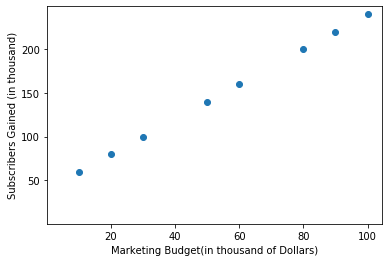

In [3]:
plt.scatter(mar_budget, subs_gained)
plt.xlim(0.120)
plt.ylim(0.260)
plt.xlabel('Marketing Budget(in thousand of Dollars)')
plt.ylabel('Subscribers Gained (in thousand)')
plt.show()

In [0]:
# SEPARATE DATA INTO TRAINING AND TESTING DATA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mar_budget, subs_gained, random_state=42, train_size=0.8, test_size=0.2)

In [0]:
# BUILDING A LAYER
# input_shape=[1]: means that the input to this layer is a single value
# units=1: specifies the number of neourons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem.

layer_0 = tf.keras.layers.Dense(units=1, input_shape=[1])

In [0]:
# ASSEMBLE LAYERS IN TO THE MODEL

model =tf.keras.Sequential([layer_0])

In [0]:
# Or you can also write... (to combine above 2)
# model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input=shape[1])])

In [0]:
# COMPILE THE MODEL WITH LOSS AND OPTIMISER FUNCTIONS
# Adam is the name of the optimizer, and 0.1 is the learning rate, which is 0.001 as the usual default
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

In [14]:
# TRAIN THE MODEL BY CALLING THE FIT METHOD
# epochs defines how many times the cycle should be run
# verbose controls how much output the method produces
trained_model = model.fit(X_train, y_train, epochs=1000, verbose=False)
print("Finished training the model")

Finished training the model


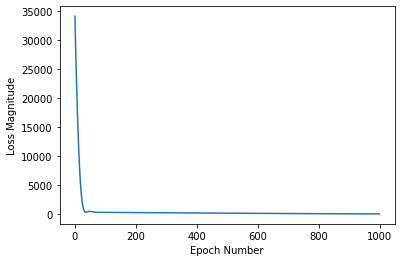

In [16]:
#Visualise the training statistics
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(trained_model.history['loss'])

In [17]:
# USE THE MODEL TO PREDICT THE VALUES
print(model.predict([80,0]))

[[201.16849 ]
 [ 25.945724]]


In [26]:
# Predict labels for all test data points and compare them with the actual data points
y_pred = model.predict(X_test)
print('Actual | ValuestPredicted Values')
print(y_test,'|', y_pred.reshape(1,-1))

Actual | ValuestPredicted Values
[200.  80.] | [[201.16849  69.75142]]


In [27]:
# Verify the model accuracy using performance metric
# R^2 of 1 indicates the regression prefictions perfectly fit the data

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9852223924605318

In [35]:
# EXPERIMENT - 3 LAYERS

l_0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l_1 = tf.keras.layers.Dense(units=5)
l_2 = tf.keras.layers.Dense(units=1)

model = tf.keras.Sequential([l_0,l_1,l_2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(X_train,y_train,epochs=2000,verbose=False)
print('\n Finished training Model')


 Finished training Model


In [40]:
print(model.predict([80]))
y_pred = model.predict(X_test)
print(r2_score(y_test,y_pred))

[[199.99998]]
1.0
